In [182]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# LSTM Model applied on 2nd Dataset

In [183]:
data = pd.read_csv(r'C:\Users\hp\Downloads\APDS\Econometrics with R\temperature_csv\RX_CACA5_Merged -Temp.csv')
data.head()

,time,drivingEndBearingTemp-I,drivingEndBearingTemp-II,nonDrivingEndBearingTemp-I,nonDrivingEndBearingTemp-II
0,10:47:56,35.9,36.2,35.7,34.1
1,10:48:57,36.5,36.9,36.2,34.6
2,10:49:58,37.2,37.5,36.6,35.0
3,10:50:58,37.8,38.2,37.0,35.4
4,10:51:58,38.5,38.8,37.3,35.7


In [184]:
#data = data.replace(0, np.NaN).ffill()

In [185]:
lstm_data = data.copy()

In [186]:
#lstm_data
    
# Drop profile_id column
#lstm_data = lstm_data.drop('profile_id', axis=1)

In [187]:
# Split df into X and y
data = lstm_data[['time', 'drivingEndBearingTemp-I', 'drivingEndBearingTemp-II']]
data

,time,drivingEndBearingTemp-I,drivingEndBearingTemp-II
0,10:47:56,35.9,36.2
1,10:48:57,36.5,36.9
2,10:49:58,37.2,37.5
3,10:50:58,37.8,38.2
4,10:51:58,38.5,38.8
...,...,...,...
176,13:46:07,59.6,60.0
177,13:47:08,59.6,60.0
178,13:48:09,59.6,59.9
179,13:49:09,59.5,59.9


In [188]:
#df['temp'] = data[['drivingEndBearingTemp-I', 'drivingEndBearingTemp-II','nonDrivingEndBearingTemp-I', 'nonDrivingEndBearingTemp-II'].mean(axis=1)

data['temp'] = data['drivingEndBearingTemp-I'] + data['drivingEndBearingTemp-II'] 
#data['temp'] = d['temp']/4
data['temp'] = data['temp'].div(2).round(2)

data = data.drop(['drivingEndBearingTemp-I', 'drivingEndBearingTemp-II'], axis=1)
#data = data.drop('time', axis=1)
data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_8180\3557252640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp'] = data['drivingEndBearingTemp-I'] + data['drivingEndBearingTemp-II']
C:\Users\hp\AppData\Local\Temp\ipykernel_8180\3557252640.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp'] = data['temp'].div(2).round(2)


,time,temp
0,10:47:56,36.05
1,10:48:57,36.70
2,10:49:58,37.35
3,10:50:58,38.00
4,10:51:58,38.65


In [189]:
data.index = pd.to_datetime(data["time"], format='%H:%M:%S')
data = data.drop('time', axis=1)

In [190]:
data.shape

(181, 1)

In [191]:
data.head()

,temp
time,
1900-01-01 10:47:56,36.05
1900-01-01 10:48:57,36.70
1900-01-01 10:49:58,37.35
1900-01-01 10:50:58,38.00
1900-01-01 10:51:58,38.65


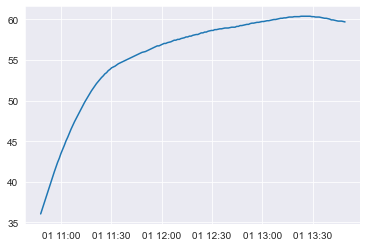

In [192]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['temp'])

In [193]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [194]:
time_step = 5
a,b = df_to_X_y(data, time_step)
X2 = a.reshape(176,5,1)
y2 = b.reshape(176)
X2.shape, y2.shape

((176, 5, 1), (176,))

In [195]:
X2

array([[[36.05],
        [36.7 ],
        [37.35],
        [38.  ],
        [38.65]],

       [[36.7 ],
        [37.35],
        [38.  ],
        [38.65],
        [39.3 ]],

       [[37.35],
        [38.  ],
        [38.65],
        [39.3 ],
        [39.95]],

       [[38.  ],
        [38.65],
        [39.3 ],
        [39.95],
        [40.6 ]],

       [[38.65],
        [39.3 ],
        [39.95],
        [40.6 ],
        [41.2 ]],

       [[39.3 ],
        [39.95],
        [40.6 ],
        [41.2 ],
        [41.8 ]],

       [[39.95],
        [40.6 ],
        [41.2 ],
        [41.8 ],
        [42.4 ]],

       [[40.6 ],
        [41.2 ],
        [41.8 ],
        [42.4 ],
        [42.9 ]],

       [[41.2 ],
        [41.8 ],
        [42.4 ],
        [42.9 ],
        [43.5 ]],

       [[41.8 ],
        [42.4 ],
        [42.9 ],
        [43.5 ],
        [44.  ]],

       [[42.4 ],
        [42.9 ],
        [43.5 ],
        [44.  ],
        [44.5 ]],

       [[42.9 ],
        [43.5 ],
        [

In [196]:
y2

array([39.3 , 39.95, 40.6 , 41.2 , 41.8 , 42.4 , 42.9 , 43.5 , 44.  ,
       44.5 , 45.05, 45.5 , 46.  , 46.5 , 46.95, 47.4 , 47.8 , 48.2 ,
       48.6 , 49.  , 49.4 , 49.8 , 50.15, 50.5 , 50.85, 51.2 , 51.5 ,
       51.8 , 52.1 , 52.35, 52.6 , 52.85, 53.05, 53.3 , 53.45, 53.7 ,
       53.85, 54.05, 54.15, 54.25, 54.4 , 54.55, 54.65, 54.75, 54.85,
       54.95, 55.05, 55.15, 55.25, 55.35, 55.45, 55.55, 55.65, 55.75,
       55.85, 55.95, 56.  , 56.05, 56.15, 56.25, 56.35, 56.45, 56.55,
       56.65, 56.75, 56.75, 56.85, 56.95, 57.05, 57.05, 57.15, 57.2 ,
       57.25, 57.35, 57.45, 57.45, 57.55, 57.55, 57.65, 57.7 , 57.75,
       57.85, 57.85, 57.95, 57.95, 58.05, 58.1 , 58.15, 58.15, 58.25,
       58.35, 58.35, 58.45, 58.45, 58.55, 58.6 , 58.65, 58.65, 58.75,
       58.75, 58.8 , 58.85, 58.85, 58.9 , 58.95, 58.95, 58.95, 59.  ,
       59.05, 59.05, 59.05, 59.15, 59.15, 59.25, 59.25, 59.3 , 59.35,
       59.4 , 59.4 , 59.5 , 59.55, 59.55, 59.6 , 59.65, 59.65, 59.7 ,
       59.75, 59.75,

In [197]:
X_train2, y_train2 = X2[:100], y2[:100]
X_val2, y_val2 = X2[100:120], y2[100:120]
X_test2, y_test2 = X2[120:], y2[120:]
#X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

In [198]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 64)                16896     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [199]:
cp1 = ModelCheckpoint('model1', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.02), metrics=[RootMeanSquaredError()])

In [200]:
model1.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=100, callbacks=[cp1])

Epoch 1/100
1/4 [======>.......................] - ETA: 12s - loss: 2634.4058 - root_mean_squared_error: 51.3265

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 23s 6s/step - loss: 2429.7937 - root_mean_squared_error: 49.2929 - val_loss: 2026.0598 - val_root_mean_squared_error: 45.0118
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 1647.8794 - root_mean_squared_error: 40.5941

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 18s 6s/step - loss: 1225.2516 - root_mean_squared_error: 35.0036 - val_loss: 774.9688 - val_root_mean_squared_error: 27.8383
Epoch 3/100
1/4 [======>.......................] - ETA: 0s - loss: 502.6243 - root_mean_squared_error: 22.4193

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 17s 6s/step - loss: 340.4601 - root_mean_squared_error: 18.4516 - val_loss: 91.4409 - val_root_mean_squared_error: 9.5625
Epoch 4/100
1/4 [======>.......................] - ETA: 0s - loss: 44.5828 - root_mean_squared_error: 6.6770

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 16s 5s/step - loss: 40.3160 - root_mean_squared_error: 6.3495 - val_loss: 27.1046 - val_root_mean_squared_error: 5.2062
Epoch 5/100
4/4 [==============================] - 0s 23ms/step - loss: 188.9929 - root_mean_squared_error: 13.7475 - val_loss: 66.7237 - val_root_mean_squared_error: 8.1685
Epoch 6/100
1/4 [======>.......................] - ETA: 0s - loss: 222.1860 - root_mean_squared_error: 14.9059

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 19s 6s/step - loss: 183.0434 - root_mean_squared_error: 13.5294 - val_loss: 3.1582 - val_root_mean_squared_error: 1.7771
Epoch 7/100
4/4 [==============================] - 0s 27ms/step - loss: 56.8352 - root_mean_squared_error: 7.5389 - val_loss: 41.0807 - val_root_mean_squared_error: 6.4094
Epoch 8/100
4/4 [==============================] - 0s 24ms/step - loss: 33.7733 - root_mean_squared_error: 5.8115 - val_loss: 128.4751 - val_root_mean_squared_error: 11.3347
Epoch 9/100
4/4 [==============================] - 0s 22ms/step - loss: 65.8926 - root_mean_squared_error: 8.1174 - val_loss: 142.6309 - val_root_mean_squared_error: 11.9428
Epoch 10/100
4/4 [==============================] - 0s 26ms/step - loss: 59.4186 - root_mean_squared_error: 7.7083 - val_loss: 79.9709 - val_root_mean_squared_error: 8.9426
Epoch 11/100
4/4 [==============================] - 0s 27ms/step - loss: 31.5178 - root_mean_squared_error: 5.6141 - val_loss: 22.2612 - val_root_m

4/4 [==============================] - 0s 26ms/step - loss: 28.7663 - root_mean_squared_error: 5.3634 - val_loss: 21.3653 - val_root_mean_squared_error: 4.6223
Epoch 54/100
4/4 [==============================] - 0s 28ms/step - loss: 27.1417 - root_mean_squared_error: 5.2098 - val_loss: 42.1744 - val_root_mean_squared_error: 6.4942
Epoch 55/100
4/4 [==============================] - 0s 19ms/step - loss: 27.3199 - root_mean_squared_error: 5.2268 - val_loss: 41.1570 - val_root_mean_squared_error: 6.4154
Epoch 56/100
4/4 [==============================] - 0s 20ms/step - loss: 27.0751 - root_mean_squared_error: 5.2034 - val_loss: 35.5345 - val_root_mean_squared_error: 5.9611
Epoch 57/100
4/4 [==============================] - 0s 22ms/step - loss: 26.7153 - root_mean_squared_error: 5.1687 - val_loss: 26.0143 - val_root_mean_squared_error: 5.1004
Epoch 58/100
4/4 [==============================] - 0s 20ms/step - loss: 26.7659 - root_mean_squared_error: 5.1736 - val_loss: 30.2497 - val_root_me

4/4 [==============================] - 0s 22ms/step - loss: 27.2164 - root_mean_squared_error: 5.2169 - val_loss: 45.7567 - val_root_mean_squared_error: 6.7644


In [201]:
cp1 = ModelCheckpoint('model1', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.015), metrics=[RootMeanSquaredError()])

In [202]:
model1.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=40, callbacks=[cp1])

Epoch 1/40
1/4 [======>.......................] - ETA: 19s - loss: 25.8616 - root_mean_squared_error: 5.0854

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 27s 7s/step - loss: 30.7789 - root_mean_squared_error: 5.5479 - val_loss: 68.8725 - val_root_mean_squared_error: 8.2989
Epoch 2/40
1/4 [======>.......................] - ETA: 0s - loss: 36.7312 - root_mean_squared_error: 6.0606

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 20s 7s/step - loss: 36.2511 - root_mean_squared_error: 6.0209 - val_loss: 36.3489 - val_root_mean_squared_error: 6.0290
Epoch 3/40
1/4 [======>.......................] - ETA: 0s - loss: 31.3395 - root_mean_squared_error: 5.5982

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 21s 7s/step - loss: 27.1676 - root_mean_squared_error: 5.2123 - val_loss: 5.1958 - val_root_mean_squared_error: 2.2794
Epoch 4/40
4/4 [==============================] - 0s 23ms/step - loss: 33.7986 - root_mean_squared_error: 5.8137 - val_loss: 34.4747 - val_root_mean_squared_error: 5.8715
Epoch 5/40
4/4 [==============================] - 0s 23ms/step - loss: 27.4583 - root_mean_squared_error: 5.2401 - val_loss: 69.2242 - val_root_mean_squared_error: 8.3201
Epoch 6/40
4/4 [==============================] - 0s 22ms/step - loss: 32.4408 - root_mean_squared_error: 5.6957 - val_loss: 37.0367 - val_root_mean_squared_error: 6.0858
Epoch 7/40
4/4 [==============================] - 0s 25ms/step - loss: 27.2685 - root_mean_squared_error: 5.2219 - val_loss: 13.3849 - val_root_mean_squared_error: 3.6585
Epoch 8/40
4/4 [==============================] - 0s 23ms/step - loss: 29.3873 - root_mean_squared_error: 5.4210 - val_loss: 31.5259 - val_root_mean_squared_e

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 21s 7s/step - loss: 13.4137 - root_mean_squared_error: 3.6625 - val_loss: 2.6600 - val_root_mean_squared_error: 1.6310
Epoch 16/40
4/4 [==============================] - 0s 25ms/step - loss: 14.9628 - root_mean_squared_error: 3.8682 - val_loss: 16.5861 - val_root_mean_squared_error: 4.0726
Epoch 17/40
4/4 [==============================] - 0s 22ms/step - loss: 10.0061 - root_mean_squared_error: 3.1632 - val_loss: 8.1870 - val_root_mean_squared_error: 2.8613
Epoch 18/40
1/4 [======>.......................] - ETA: 0s - loss: 8.4347 - root_mean_squared_error: 2.9042

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 22s 7s/step - loss: 7.6489 - root_mean_squared_error: 2.7657 - val_loss: 0.1158 - val_root_mean_squared_error: 0.3404
Epoch 19/40
4/4 [==============================] - 0s 26ms/step - loss: 10.0935 - root_mean_squared_error: 3.1770 - val_loss: 9.9598 - val_root_mean_squared_error: 3.1559
Epoch 20/40
4/4 [==============================] - 0s 22ms/step - loss: 6.1813 - root_mean_squared_error: 2.4862 - val_loss: 4.1640 - val_root_mean_squared_error: 2.0406
Epoch 21/40
4/4 [==============================] - 0s 24ms/step - loss: 3.2459 - root_mean_squared_error: 1.8017 - val_loss: 7.3895 - val_root_mean_squared_error: 2.7184
Epoch 22/40
4/4 [==============================] - 0s 25ms/step - loss: 2.4393 - root_mean_squared_error: 1.5618 - val_loss: 4.5518 - val_root_mean_squared_error: 2.1335
Epoch 23/40
4/4 [==============================] - 0s 25ms/step - loss: 1.6570 - root_mean_squared_error: 1.2872 - val_loss: 1.0088 - val_root_mean_squared_error:

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


4/4 [==============================] - 19s 6s/step - loss: 0.1546 - root_mean_squared_error: 0.3932 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0985
Epoch 34/40
4/4 [==============================] - 0s 19ms/step - loss: 0.3523 - root_mean_squared_error: 0.5935 - val_loss: 0.4862 - val_root_mean_squared_error: 0.6973
Epoch 35/40
4/4 [==============================] - 0s 18ms/step - loss: 0.1440 - root_mean_squared_error: 0.3795 - val_loss: 0.7955 - val_root_mean_squared_error: 0.8919
Epoch 36/40
4/4 [==============================] - 0s 19ms/step - loss: 0.1665 - root_mean_squared_error: 0.4081 - val_loss: 0.6645 - val_root_mean_squared_error: 0.8152
Epoch 37/40
4/4 [==============================] - 0s 21ms/step - loss: 0.2149 - root_mean_squared_error: 0.4635 - val_loss: 0.1714 - val_root_mean_squared_error: 0.4140
Epoch 38/40
4/4 [==============================] - 0s 19ms/step - loss: 0.1240 - root_mean_squared_error: 0.3522 - val_loss: 0.4657 - val_root_mean_squared_error: 

In [203]:
from tensorflow.keras.models import load_model
model1 = load_model('model1')

In [204]:
train_predictions2 = model1.predict(X_train2).flatten()
train_results2 = pd.DataFrame(data={'Train Predictions2':train_predictions2, 'Train Actuals2':y_train2})
train_results2

4/4 [==============================] - 1s 5ms/step


,Train Predictions2,Train Actuals2
0,64.632828,39.30
1,64.632835,39.95
2,64.632835,40.60
3,64.632843,41.20
4,64.632843,41.80
...,...,...
95,64.632896,58.60
96,64.632896,58.65
97,64.632896,58.65
98,64.632896,58.75


In [205]:
val_predictions2 = model1.predict(X_val2).flatten()
val_results2 = pd.DataFrame(data={'Val Predictions2':val_predictions2, 'Val Actuals2':y_val2})
val_results2

1/1 [==============================] - 0s 38ms/step


,Val Predictions2,Val Actuals2
0,64.632896,58.80
1,64.632896,58.85
2,64.632896,58.85
3,64.632896,58.90
4,64.632896,58.95
5,64.632896,58.95
6,64.632896,58.95
7,64.632896,59.00
8,64.632896,59.05
9,64.632896,59.05


In [206]:
test_predictions2 = model1.predict(X_test2).flatten()
test_results2 = pd.DataFrame(data={'Test Predictions2':test_predictions2, 'Actuals2':y_test2})
test_results2

2/2 [==============================] - 0s 6ms/step


,Test Predictions2,Actuals2
0,64.632896,59.55
1,64.632896,59.55
2,64.632896,59.60
3,64.632896,59.65
4,64.632896,59.65
5,64.632896,59.70
6,64.632896,59.75
7,64.632896,59.75
8,64.632896,59.80
9,64.632896,59.85


In [207]:
from sklearn.metrics import mean_squared_error
import math
#math.sqrt(mean_squared_error(test_predictions2, y_test2))
(mean_squared_error(test_predictions2, y_test2))

21.03260126613846

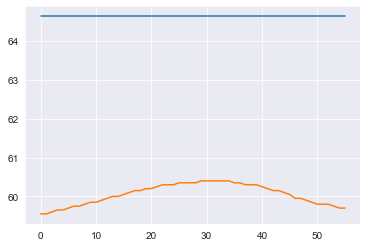

In [208]:
plt.plot(test_results2['Test Predictions2'][:])
plt.plot(test_results2['Actuals2'][:])

In [209]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

2/2 [==============================] - 0s 6ms/step


(    Predictions  Actuals
 0     64.632896    59.55
 1     64.632896    59.55
 2     64.632896    59.60
 3     64.632896    59.65
 4     64.632896    59.65
 5     64.632896    59.70
 6     64.632896    59.75
 7     64.632896    59.75
 8     64.632896    59.80
 9     64.632896    59.85
 10    64.632896    59.85
 11    64.632896    59.90
 12    64.632896    59.95
 13    64.632896    60.00
 14    64.632896    60.00
 15    64.632896    60.05
 16    64.632896    60.10
 17    64.632896    60.15
 18    64.632896    60.15
 19    64.632896    60.20
 20    64.632896    60.20
 21    64.632896    60.25
 22    64.632896    60.30
 23    64.632896    60.30
 24    64.632896    60.30
 25    64.632896    60.35
 26    64.632896    60.35
 27    64.632896    60.35
 28    64.632896    60.35
 29    64.632896    60.40
 30    64.632896    60.40
 31    64.632896    60.40
 32    64.632896    60.40
 33    64.632896    60.40
 34    64.632896    60.40
 35    64.632896    60.35
 36    64.632896    60.35
 37    64.63

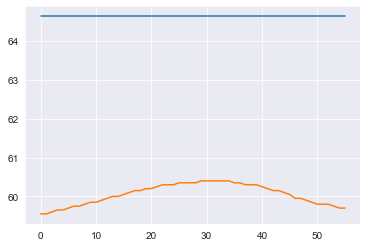

In [210]:
plot_predictions1(model1, X_test2, y_test2)

In [211]:
[acc] = [100-(100*(test_predictions2-y_test2)/y_test2)]
acc
acc.mean()

92.37409197105741

In [212]:
#If predicted value is greater than 65 then motor is rejected

print("******************************************************")
if ((test_results2["Test Predictions2"]>65).any()):
    print("Keep Motor running, predicted value is greater than 65 degrees!!!")
else:
    print("Motor Validation Passed!!!")
print("******************************************************")

******************************************************
Motor Validation Passed!!!
******************************************************
